# Trabalhos de GPU de 2023

* [simulador de warps de 4 threads](https://colab.research.google.com/drive/1VXbM1N26nDHAuJRaHPfvhxhwSLQ6A0ZL?usp=sharing) - 3 pontos

* [Kmeans com GPU](https://colab.research.google.com/drive/1TYe1COGBixQv3jjyg7Wsk_F2f9F5m005?usp=sharing)  - 5 pontos




In [ ]:
#@title
from IPython.display import YouTubeVideo
def tudum():
  return YouTubeVideo('GV3HUDMQ-F8',width=10, height=10)

# Demonstrações

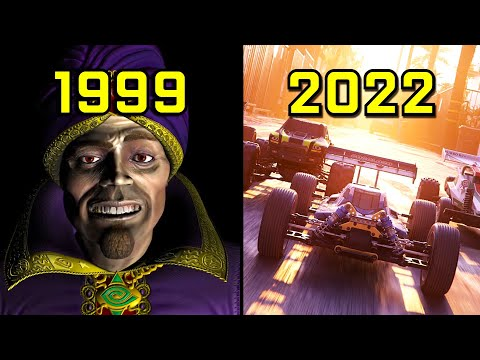

In [ ]:
#@title Evolução das GPUs
from IPython.display import YouTubeVideo
YouTubeVideo('jVoV2VysX3M',width=600, height=400)

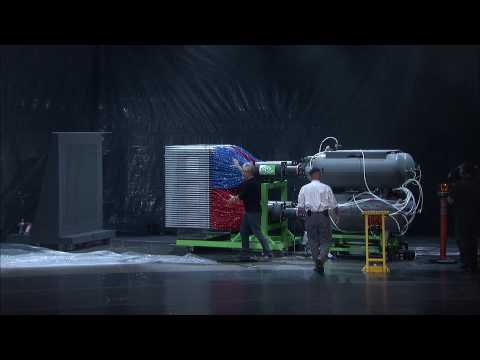

In [ ]:
#@title Explicacao Simples de CPU e GPU
from IPython.display import YouTubeVideo
YouTubeVideo('-P28LKWTzrI',width=700, height=400)

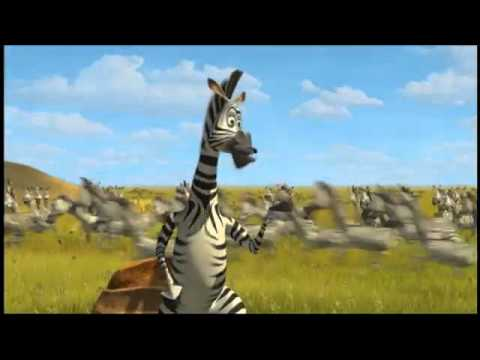

In [ ]:
#@title Explicacao do paralelismo na GPU
from IPython.display import YouTubeVideo
YouTubeVideo('Buf61h39vK8',width=600, height=400)


## [slides How GPU Computing Works | GTC 2021](https://github.com/arduinoufv/inf450/blob/master/gpu/How%20CUDA%20Programming%20Works_1647539841016001sz6e.pdf)

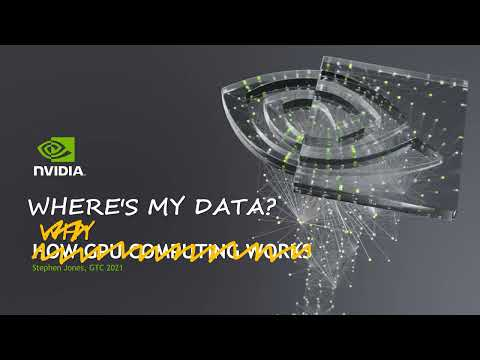

In [ ]:
#@title How GPU Computing Works | GTC 2021
from IPython.display import YouTubeVideo
YouTubeVideo('3l10o0DYJXg',width=600, height=400)

## [Slides How CUDA Programming Works](https://github.com/arduinoufv/inf450/blob/master/gpu/How%20CUDA%20Programming%20Works_1647539841016001sz6e.pdf)

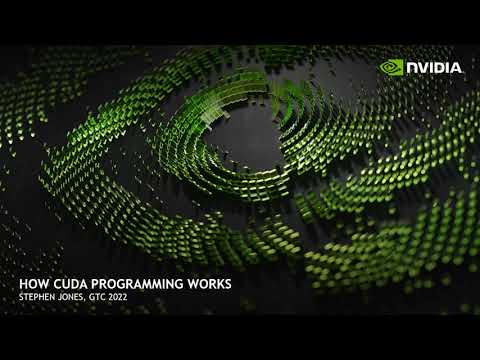

In [ ]:
#@title How CUDA Programming Works | GTC 2022
from IPython.display import YouTubeVideo
YouTubeVideo('n6M8R8-PlnE',width=600, height=400)

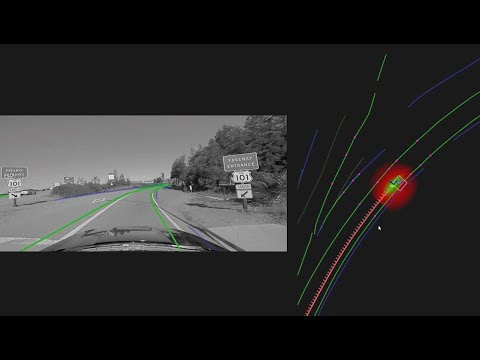

In [ ]:
#@title NVIDIA DRIVE—GTC 2018 Demonstration
from IPython.display import YouTubeVideo
YouTubeVideo('PjH_1hEoIDs',width=600, height=400)

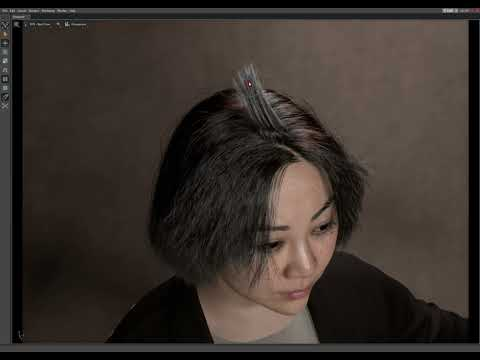

In [ ]:
#@title Not a Hair Out of Place: Neural Physics Enables Realistic Simulations
from IPython.display import YouTubeVideo
YouTubeVideo('ehesid36d4E',width=600, height=400)

# Introdução a Programação CUDA


* [CUDA C/C++ Basics Supercomputing 2011 Tutorial](https://drive.google.com/file/d/1p5Q550yCeIAcNswJgjB8cM-BIgDftiBX/view?usp=sharing)
* [Slides de Introdução a GPU](https://docs.google.com/presentation/d/1Se7zXY1vvKwTDd_48hfq5rrW8XKi02LQqwPUGbfKCKA/edit?usp=sharing)
* [Assembler PTX](https://drive.google.com/drive/u/0/folders/1mWvfJq9TCMZQ6TGfkRXX_tUgaj6opAwk)
* [Better Performance at Lower Occupancy](https://drive.google.com/file/d/1HpqyaY444lmWyeJGC61yPEvQ2NIqVUg7/view?usp=sharing)
* [Turing Architecture](https://courses.engr.illinois.edu/cs433/fa2019/projects/nvidia_turing.pdf)
* [V100](https://images.nvidia.com/content/volta-architecture/pdf/volta-architecture-whitepaper.pdf)
* [Dissecting the NVidia Turing T4 GPU via Microbenchmarking](https://drive.google.com/file/d/1lCZVKniTPoEFuBhptEUM7OoCHdINkD2g/view?usp=sharing)

# Conceitos

* [Colab com os primeiros passos em GPU](https://colab.research.google.com/drive/1yZ-k7Cp9NiNHjdI2Sh3O3lTVKmLIwRtv?usp=sharing)

* [Colab com o trabalho de Kmeans de 2023](https://colab.research.google.com/drive/1TYe1COGBixQv3jjyg7Wsk_F2f9F5m005?usp=sharing)

In [ ]:
#@title Configurando Colab e Mostrando a GPU
!pip install git+https://github.com/lesc-ufv/cad4u >& /dev/null
!git clone https://github.com/lesc-ufv/cad4u >& /dev/null
%load_ext plugin
!pip install -q gradio &> /dev/null
!nvidia-smi

Thu Jun 22 20:44:31 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
#@title **Hello World**, Qual é a ordem de execução CPU e GPU ?
%%gpu
#include <stdio.h>

//Kernel (indicado pela keyword __global__)

__global__ void helloFromGPU(){
    printf("Hello World from GPU %d!\n",threadIdx.x);
    return;
}

int main(){

    //Chamada do Kernel
    helloFromGPU<<<2,5>>>();           // linha 1
    printf("Hello World from CPU!\n");  // linha 2
    cudaDeviceSynchronize();   // linha 3


    return 0;
}

Hello World from CPU!
Hello World from GPU 0!
Hello World from GPU 1!
Hello World from GPU 2!
Hello World from GPU 3!
Hello World from GPU 4!
Hello World from GPU 0!
Hello World from GPU 1!
Hello World from GPU 2!
Hello World from GPU 3!
Hello World from GPU 4!



## Thread na GPU

Em CUDA, um thread é uma linha de execução que será mapeada em um núcleo de processamento em uma GPU. Os threads CUDA são agrupados em blocos, que por sua vez formam uma grade. Essa organização hierárquica de threads em blocos e grades permite a execução massivamente paralela de tarefas.

Ao escrever um programa em CUDA, você pode definir quantos threads serão executados em paralelo e como eles interagem uns com os outros. Cada thread é identificado por um índice único dentro do bloco (**ThreadIdx**) e da grade (**BlockIdx**), permitindo que eles acessem e processem dados de maneira coordenada.

## Warp

O warp é um conceito fundamental na arquitetura das GPUs NVIDIA e na programação CUDA. Em CUDA, um warp é um grupo fixo de threads que são executados em paralelo pela GPU. Na maioria das GPUs NVIDIA modernas, o tamanho de um warp é de 32 threads.


Os warps são a unidade básica de execução em uma GPU NVIDIA. Quando um bloco de threads é executado, ele é dividido em warps. Cada warp é atribuído a um processador/streaming multiprocessor (SM) na GPU e executado simultaneamente.

![](https://nanxiao.me/wp-content/uploads/2016/12/Capture-5.jpg)

A execução em warp é importante porque as GPUs NVIDIA implementam a execução SIMD (Single Instruction, Multiple Data). Isso significa que todos os threads em um warp executam a mesma instrução ao mesmo tempo, mas podem (e devem) trabalhar com diferentes conjuntos de dados. Não tem garantia de ordem durante a execução entre os WARPs.

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRcAIoZU36jppt9OJnUG14kviIGMTMwQVJNzw&usqp=CAU" width="600px"/>

![]()


É importante considerar as propriedades do warp ao projetar algoritmos e kernels CUDA. Por exemplo, quando um warp executa um desvio condicional, as threads que seguem caminhos diferentes dentro do warp são serializadas, o que pode levar a um desempenho reduzido.

![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSUuuueLOGn0KeYUdo3HAahCmqU6JD5ksni_l4N-DDLR5xVDpBz27nLCWyIWOaTBCKHYa0&usqp=CAU)

![](https://nanxiao.me/wp-content/uploads/2016/12/Capture-6.jpg)

Portanto, é ideal projetar algoritmos que minimizem as ramificações divergentes dentro de um warp para maximizar o paralelismo e o desempenho.

A GPU modernas como a V100 tem recursos para melhorar o tratamento de divergências, mas mesmo assim terá perda de desempenho. {mais informações aqui](https://developer.nvidia.com/blog/using-cuda-warp-level-primitives/).

![](https://developer-blogs.nvidia.com/wp-content/uploads/2017/05/image5-625x203.png)

## Bloco

![](https://nyu-cds.github.io/python-gpu/fig/02-threadmapping.png)


## Grade





In [ ]:
#@title Número do Thread e do Bloco
%%gpu
#include <stdio.h>

//Kernel (indicado pela keyword __global__)

__global__ void helloFromGPU(int blx, int thr){
    if ((blockIdx.x == blx) && (threadIdx.x == thr)) {
        printf("Hello World from GPU! Block number: %d Thread number: %d\n", blockIdx.x ,threadIdx.x);
    }

    return;
}

int main(){
    printf("Hello World from CPU!\n");

    //Chamada do Kernel
    helloFromGPU<<<1024*1024*1024,1024>>>(10000000,5);

    cudaDeviceReset();
    cudaDeviceSynchronize();
    return 0;
}

Hello World from CPU!
Hello World from GPU! Block number: 10000000 Thread number: 5



## Multiprocessador SMX

Os multiprocessadores SMX (Streaming Multiprocessors Next-Generation) são uma unidade de processamento chave nas GPUs (Graphics Processing Units) da NVIDIA, usadas para acelerar o processamento gráfico e computação paralela. Eles foram introduzidos nas arquiteturas de GPU da NVIDIA a partir da geração Kepler.

Cada multiprocessador SMX é composto por várias unidades funcionais, como núcleos de processamento CUDA, unidades de textura, unidades de mapeamento de textura, cache L1, registradores e outros elementos. Esses componentes trabalham juntos para executar tarefas em paralelo, aproveitando a capacidade de processamento massivamente paralelo da GPU.

A arquitetura dos multiprocessadores SMX foi projetada para otimizar o desempenho e a eficiência energética. Eles possuem maior número de núcleos de processamento CUDA em comparação com as gerações anteriores, além de recursos aprimorados de cache e largura de banda de memória.

Os multiprocessadores SMX executam as tarefas de forma simultânea e eficiente, dividindo o processamento em vários threads que são executados em paralelo. Cada multiprocessador SMX pode suportar centenas de threads em execução ao mesmo tempo, com o hardware gerenciando a troca de contexto entre esses threads para maximizar a utilização dos recursos disponíveis.

Os multiprocessadores SMX também possuem uma hierarquia de memória, incluindo caches L1 e L2, que são projetados para minimizar os atrasos de acesso à memória global, melhorando o desempenho ao reduzir a latência de leitura e gravação de dados.

Além disso, os multiprocessadores SMX podem executar várias operações em paralelo, como cálculos de ponto flutuante, operações lógicas e aritméticas, e operações de controle de fluxo, permitindo uma ampla gama de aplicações de computação paralela em GPUs.

Em resumo, os multiprocessadores SMX são componentes-chave nas GPUs da NVIDIA, responsáveis por executar tarefas em paralelo e acelerar o processamento gráfico e computação paralela. Eles são projetados para oferecer desempenho, eficiência energética e suporte a várias operações simultâneas, garantindo uma execução eficiente dos cálculos em uma GPU.

## Memórias da GPU

Na GPU da NVIDIA, existem diferentes tipos de memória e registradores disponíveis, cada um com características e usos distintos. Vou explicar a diferença entre a memória global, a memória compartilhada, a memória constante e os registradores, bem como o contexto e o melhor modo de acesso para cada uma delas.

1. Memória Global:
A memória global é o maior espaço de memória disponível na GPU. Ela é acessível a todos os threads e mantém dados persistentes durante a execução do kernel CUDA. A memória global é geralmente usada para armazenar dados que são lidos e gravados por vários threads em diferentes partes do código.

Contexto: A memória global é acessada de forma síncrona por todos os threads em uma grade, o que significa que é possível ocorrer colisões de acesso se vários threads tentarem gravar no mesmo endereço de memória ao mesmo tempo. Portanto, a coordenação adequada e o uso de mecanismos de exclusão mútua são necessários para evitar condições de corrida.

Melhor Modo de Acesso: O acesso à memória global é mais eficiente quando os threads fazem leituras ou gravações em blocos contíguos de dados, permitindo aproveitar a localidade espacial e melhorar a eficiência da memória cache.

2. Memória Compartilhada:
A memória compartilhada é um espaço de memória de baixa latência e alta largura de banda que é compartilhado entre os threads em um mesmo bloco. Ela é usada para compartilhar dados entre threads de um bloco, reduzindo a latência de acesso à memória global e melhorando o desempenho.

Contexto: A memória compartilhada é acessada por todos os threads dentro de um bloco e é visível apenas para esses threads. Ela é ideal para armazenar dados que são acessados repetidamente por vários threads e que podem ser compartilhados para evitar múltiplas leituras da memória global.

Melhor Modo de Acesso: A memória compartilhada é eficiente quando os threads cooperam entre si, compartilhando dados durante a execução de um bloco. Um bom padrão de acesso é carregar dados da memória global para a memória compartilhada de forma cooperativa no início de um bloco e, em seguida, acessar esses dados compartilhados localmente para minimizar as leituras da memória global.

3. Memória Constante:
A memória constante é um espaço de memória somente leitura otimizado para acesso uniforme. Ela é usada para armazenar dados que não são modificados durante a execução do kernel CUDA, como constantes, tabelas de pesquisa ou parâmetros.

Contexto: A memória constante é acessada por todos os threads e é projetada para fornecer acesso de leitura eficiente e uniforme a dados que não mudam ao longo da execução do kernel.

Melhor Modo de Acesso: O acesso à memória constante é mais eficiente quando vários threads acessam os mesmos dados de forma uniforme, evitando acesso irregular e saltos de leitura. Também é útil para evitar repetidas leituras de dados constantes armazenados na memória global.

4. Registradores:

Os registradores são unidades de memória muito rápidas e de baixa latência disponíveis em cada multiprocessador SMX da GPU. Eles são usados para variáveis locais dentro de um thread CUDA durante a execução de um kernel.

Cada thread tem um número limitado de registradores disponíveis para armazenar seus dados. O limite de registradores por thread varia de acordo com a arquitetura da GPU. Por exemplo, nas GPUs NVIDIA baseadas na arquitetura Kepler, o limite é geralmente de 255 registradores por thread.

Além disso, cada multiprocessador SMX possui uma quantidade total de registradores disponíveis, compartilhados entre todos os threads que estão sendo executados nesse SMX. O limite de registradores por SMX também varia de acordo com a arquitetura. Por exemplo, em algumas GPUs Kepler, o limite é de 65.536 registradores por SMX, enquanto em arquiteturas mais recentes, houve uma redução no número de núcleos por SMX e portanto, existe  uma proporção maior de registradores por núcleo.

O uso eficiente dos registradores é importante para otimizar o desempenho e a utilização da memória na GPU. O acesso aos registradores é extremamente rápido e, portanto, é preferível armazenar dados e variáveis frequentemente usados nos registradores para reduzir a latência de acesso. No entanto, é importante evitar o uso excessivo de registradores, uma vez que o limite por thread e por SMX pode ser alcançado. O que pode gerar register spilling.



## Register spilling

 Um termo usado na programação em CUDA e em outros modelos de programação paralela para descrever uma situação em que o número de registradores necessários por thread excede o número disponível na GPU. Quando isso acontece, os registradores excedentes não podem ser alocados e é necessário armazenar algumas variáveis em memória, como a memória global ou compartilhada, em vez de nos registradores.

O register spilling ocorre quando o código CUDA utiliza um número excessivo de variáveis locais ou quando os cálculos realizados pelos threads requerem um grande número de registradores. Como cada thread possui um número limitado de registradores disponíveis, quando esse limite é excedido, ocorre a alocação de registradores adicionais em memória.

O registro de variáveis em memória em vez de nos registradores pode levar a um aumento na latência de acesso aos dados, já que o acesso aos registradores é muito mais rápido do que o acesso à memória. Isso pode impactar negativamente o desempenho do kernel CUDA.

Para minimizar o register spilling, é importante otimizar o código CUDA e reduzir a quantidade de variáveis locais usadas pelos threads. Isso pode ser feito através de técnicas como a fusão de loops, a redução do escopo das variáveis locais e a reutilização de variáveis sempre que possível. Também é importante considerar a estrutura do código e a organização dos threads para evitar o uso excessivo de registradores.

Ao enfrentar o register spilling, é recomendável analisar os relatórios e métricas fornecidos pelas ferramentas de profiling da GPU para identificar os pontos problemáticos e otimizar o código para reduzir a demanda por registradores e melhorar o desempenho geral.

# Exemplos

In [ ]:
#@title Somar dois números na GPU: Declara, Aloca (cudamalloc), Copia CPU->GPU, Executa código na GPU, Copia de volta GPU-> CPU
%%gpu
#include <stdio.h>
#include <stdlib.h>

__global__ void add(int *a, int *b, int *c) {
*c = *a + *b ;
}

int main() {
int a, b, c;
// host copies of variables a, b & c
int *d_a, *d_b, *d_c;
// device copies of variables a, b & c
int size = sizeof(int);
// Allocate space for device copies of a, b, c
cudaMalloc((void **)&d_a, size);
cudaMalloc((void **)&d_b, size);
cudaMalloc((void **)&d_c, size);
// Setup input values
c = 0;
a = 8;
b = 2;
// Copy inputs to device
cudaMemcpy(d_a, &a, size, cudaMemcpyHostToDevice);
cudaMemcpy(d_b, &b, size, cudaMemcpyHostToDevice);
// Launch add() kernel on GPU
add<<<1,1>>>(d_a, d_b, d_c);
// Copy result back to host
cudaError err = cudaMemcpy(&c, d_c, size, cudaMemcpyDeviceToHost);
if(err!=cudaSuccess) {
    printf("CUDA error copying to Host: %s\n", cudaGetErrorString(err));
}
printf("result is %d\n",c);
// Cleanup
cudaFree(d_a);
cudaFree(d_b);
cudaFree(d_c);
return 0;
}

result is 10



In [ ]:
#@title Soma de Vetores
%%nvprof
#include <sys/time.h>
#define CHECK(call)                                                            \
{                                                                              \
    const cudaError_t error = call;                                            \
    if (error != cudaSuccess)                                                  \
    {                                                                          \
        fprintf(stderr, "Error: %s:%d, ", __FILE__, __LINE__);                 \
        fprintf(stderr, "code: %d, reason: %s\n", error,                       \
                cudaGetErrorString(error));                                    \
    }                                                                          \
}


#include <cuda_runtime.h>
#include <stdio.h>


void initialData(float *ip, int size)
{
    // generate different seed for random number
    time_t t;
    srand((unsigned) time(&t));

    for (int i = 0; i < size; i++)
    {
        ip[i] = (float)( rand() & 0xFF ) / 10.0f;
    }

    return;
}

__global__ void sum(float *A, float *B, float *C, const int N)
{
    int i = blockIdx.x * blockDim.x + threadIdx.x;


    if (i < N) C[i] = A[i]+B[i];
}

int main(int argc, char **argv)
{

    float elapsed_time;

    // set up device
    int dev = 0;
    cudaDeviceProp deviceProp;
    CHECK(cudaGetDeviceProperties(&deviceProp, dev));
    printf("Using Device %d: %s\n", dev, deviceProp.name);
    CHECK(cudaSetDevice(dev));

    // set up data size of vectors
    int nElem = 1 << 27; // 2^26 = 64 M elements, 64M*4bytes = 256 Mbytes
    printf("Vector Size %d\n", nElem);

    // malloc host memory
    size_t nBytes = nElem * sizeof(float);

    float *h_A, *h_B, *hostRef, *h_C;
    h_A     = (float *)malloc(nBytes);
    h_B     = (float *)malloc(nBytes);
    hostRef = (float *)malloc(nBytes);
    h_C  = (float *)malloc(nBytes);

    initialData(h_A, nElem);
    initialData(h_B, nElem);
    memset(hostRef, 0, nBytes);
    memset(h_C,  0, nBytes);

    // malloc device global memory
    float *d_A, *d_B, *d_C;
    CHECK(cudaMalloc((float**)&d_A, nBytes));
    CHECK(cudaMalloc((float**)&d_B, nBytes));
    CHECK(cudaMalloc((float**)&d_C, nBytes));

    // transfer data from host to device
    CHECK(cudaMemcpy(d_A, h_A, nBytes, cudaMemcpyHostToDevice));
    CHECK(cudaMemcpy(d_B, h_B, nBytes, cudaMemcpyHostToDevice));

    // invoke kernel at host side
    int iLen = 512;
    dim3 block (iLen);
    dim3 grid  ((nElem + block.x - 1) / block.x);

    cudaEvent_t start, stop;
    CHECK(cudaEventCreate(&start));
    CHECK(cudaEventCreate(&stop));
    // record start event
    CHECK(cudaEventRecord(start, 0));


    // Kernel Call *********************

    sum<<<grid, block>>>(d_A, d_B, d_C, nElem);

    // *********************************

    CHECK(cudaEventRecord(stop, 0));
    CHECK(cudaEventSynchronize(stop));
    // calculate elapsed time
    CHECK(cudaEventElapsedTime(&elapsed_time, start, stop));
    printf("Measured time for parallel execution = %.6fms\n",
           elapsed_time );

    // check kernel error
    CHECK(cudaGetLastError()) ;

    // copy kernel result back to host side
    CHECK(cudaMemcpy(h_C, d_C, nBytes, cudaMemcpyDeviceToHost));

    // free device global memory
    CHECK(cudaFree(d_A));
    CHECK(cudaFree(d_B));
    CHECK(cudaFree(d_C));

    // free host memory
    free(h_A);
    free(h_B);
    free(hostRef);
    free(h_C);

    return(0);
}

==1445== NVPROF is profiling process 1445, command: /content/code.out
==1445== Profiling application: /content/code.out
Using Device 0: Tesla T4
Vector Size 134217728
Measured time for parallel execution = 6.403488ms
==1445== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:   66.25%  235.74ms         2  117.87ms  115.57ms  120.18ms  [CUDA memcpy HtoD]
                   31.95%  113.70ms         1  113.70ms  113.70ms  113.70ms  [CUDA memcpy DtoH]
                    1.79%  6.3871ms         1  6.3871ms  6.3871ms  6.3871ms  sum(float*, float*, float*, int)
      API calls:   55.52%  350.35ms         3  116.78ms  114.18ms  120.34ms  cudaMemcpy
                   42.34%  267.18ms         3  89.060ms  533.26us  266.10ms  cudaMalloc
                    1.01%  6.3923ms         1  6.3923ms  6.3923ms  6.3923ms  cudaEventSynchronize
                    0.93%  5.8775ms         3  1.9592ms  865.23us  2.8936ms  cudaFree
            

In [ ]:
#@title Exemplo do Mincurso de 2019
%cd /content
!git clone https://github.com/cacauvicosa/wscad2019.git

/content
Cloning into 'wscad2019'...
remote: Enumerating objects: 421, done.
remote: Counting objects: 100% (1/1), done.
remote: Total 421 (delta 0), reused 0 (delta 0), pack-reused 420
Receiving objects: 100% (421/421), 8.89 MiB | 4.54 MiB/s, done.
Resolving deltas: 100% (199/199), done.


In [ ]:
#@title Exemplo do Polinomio
%cd /content/wscad2019
!nvcc -arch=sm_75 1_Introducao/poly.cu
!nvprof ./a.out
%cd /content

/content/wscad2019
==2117== NVPROF is profiling process 2117, command: ./a.out
==2117== Profiling application: ./a.out
==2117== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:   96.77%  702.93ms         4  175.73ms  112.85ms  353.49ms  [CUDA memcpy DtoH]
                    0.86%  6.2473ms         1  6.2473ms  6.2473ms  6.2473ms  poli4(float*, int)
                    0.80%  5.8091ms         1  5.8091ms  5.8091ms  5.8091ms  poli3(float*, int)
                    0.79%  5.7480ms         1  5.7480ms  5.7480ms  5.7480ms  poli2(float*, int)
                    0.78%  5.6717ms         1  5.6717ms  5.6717ms  5.6717ms  poli1(float*, int)
      API calls:   82.58%  705.36ms         4  176.34ms  113.22ms  354.77ms  cudaMemcpy
                   14.56%  124.39ms         2  62.196ms  602.89us  123.79ms  cudaMalloc
                    2.75%  23.492ms         4  5.8729ms  5.6761ms  6.2546ms  cudaDeviceSynchronize
                 

In [ ]:
#@title Intensidade Aritmetica
%%nvprof
#define POWER 26

__global__ void poli(float* poli, const int N) {
    int idx = blockIdx.x * blockDim.x + threadIdx.x;


    if (idx < N) {
        float x = poli[idx];

        poli[idx] = 5 + x * ( 7 - x * (9 + x * (5 + x * (5 + x))))- 1.0f*x + 3.0f;
    }
}

#include "/content/wscad2019/1_Introducao/poly_test.cu"

==2605== NVPROF is profiling process 2605, command: /content/code.out
Using Device 0: Tesla T4
Measured time for parallel execution = 2.927872ms
Measured time for parallel execution = 2.844832ms
==2605== Profiling application: /content/code.out
==2605== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:   95.20%  289.91ms         3  96.635ms  56.079ms  177.70ms  [CUDA memcpy DtoH]
                    1.03%  3.1237ms         1  3.1237ms  3.1237ms  3.1237ms  poli4(float*, int)
                    0.95%  2.9075ms         1  2.9075ms  2.9075ms  2.9075ms  poli3(float*, int)
                    0.95%  2.8841ms         1  2.8841ms  2.8841ms  2.8841ms  poli(float*, int)
                    0.94%  2.8772ms         1  2.8772ms  2.8772ms  2.8772ms  poli2(float*, int)
                    0.93%  2.8360ms         1  2.8360ms  2.8360ms  2.8360ms  poli1(float*, int)
      API calls:   67.75%  291.91ms         5  58.383ms  1.8400us  178.

In [ ]:
#@title Divergência de IF
%%nvprof
#define POWER 26

__global__ void poli_without_divergence(float* poli, const int N) {
    int idx = blockIdx.x * blockDim.x + threadIdx.x;
    float x;
    if (idx < N) {
       x = poli[idx];
        poli[idx] = 5 + x * ( 7 - x * (9 + x * (5 + x * (5 + x))))- 1.0f/x + 3.0f/(x*x) + x/5.0f;
    }

}

__global__ void poli_div(float* poli, const int N) {
    int idx = blockIdx.x * blockDim.x + threadIdx.x;

    float x;

    if (idx < N) {
        x = poli[idx];
        if ( threadIdx.x%2)
            poli[idx] = 5 + x * ( 4 - x * (9 + x * (9 + x * (6 - x))))- 2.0f/x + 3.0f/(x*x) + x/3.0f;
        else
            poli[idx] = 4 + x * ( 7 - x * (9 + x * (5 + x * (5 + x))))- 1.0f/x + 4.0f/(x*x) + x/5.0f;
    }

}

#include "/content/wscad2019/1_Introducao/poly_divergence.cu"

==3419== NVPROF is profiling process 3419, command: /content/code.out
Using Device 0: Tesla T4
Without divergence - Measured time for parallel execution = 6.337024ms
With Divergence - Measured time for parallel execution = 10.713504ms
==3419== Profiling application: /content/code.out
==3419== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:   55.66%  243.21ms         1  243.21ms  243.21ms  243.21ms  [CUDA memcpy DtoH]
                   37.62%  164.38ms         3  54.792ms  38.121ms  85.850ms  [CUDA memcpy HtoD]
                    2.84%  12.405ms         2  6.2027ms  6.2011ms  6.2044ms  poli_warp(float*, int)
                    2.45%  10.692ms         1  10.692ms  10.692ms  10.692ms  poli_div(float*, int)
                    1.44%  6.3088ms         1  6.3088ms  6.3088ms  6.3088ms  poli_without_divergence(float*, int)
      API calls:   64.77%  409.84ms         4  102.46ms  38.201ms  244.99ms  cudaMemcpy
             

In [ ]:
#@title 32 caminhos distintos com case
%%nvprof
#define POWER 26

__global__ void poli_without_divergence(float* poli, const int N) {
    int idx = blockIdx.x * blockDim.x + threadIdx.x;

    float x;
    if (idx < N) {
       x = poli[idx];
        poli[idx] = 5 + x * ( 7 - x * (9 + x * (5 + x * (5 + x))))- 1.0f/x + 3.0f/(x*x) + x/5.0f;
    }
}

__global__ void poli_div(float* poli, const int N) {
    int idx = blockIdx.x * blockDim.x + threadIdx.x;
    float x;
    if (idx < N) {
        x = poli[idx];
        switch (threadIdx.x%32) {
           case 0: poli[idx] = 5 + x * ( 7 - x * (9 + x * (5 + x * (5 + x))))- 1.0f/x + 3.0f/(x*x) + x/5.0f;
                   break;
           case 1: poli[idx] = 5 + x * ( 7 - x * (9 + x * (5 + x * (5 + x))))- 1.0f/x + 3.0f/(x*x) + x/5.0f;
                   break;
           case 2: poli[idx] = 5 + x * ( 7 - x * (9 + x * (5 + x * (5 + x))))- 1.0f/x + 3.0f/(x*x) + x/5.0f;
                   break;
           case 3: poli[idx] = 5 + x * ( 7 - x * (9 + x * (5 + x * (5 + x))))- 1.0f/x + 3.0f/(x*x) + x/5.0f;
                   break;
           case 4: poli[idx] = 5 + x * ( 7 - x * (9 + x * (5 + x * (5 + x))))- 1.0f/x + 3.0f/(x*x) + x/5.0f;
                   break;
           case 5: poli[idx] = 5 + x * ( 7 - x * (9 + x * (5 + x * (5 + x))))- 1.0f/x + 3.0f/(x*x) + x/5.0f;
                   break;
           case 6: poli[idx] = 5 + x * ( 7 - x * (9 + x * (5 + x * (5 + x))))- 1.0f/x + 3.0f/(x*x) + x/5.0f;
                   break;
           case 7: poli[idx] = 5 + x * ( 7 - x * (9 + x * (5 + x * (5 + x))))- 1.0f/x + 3.0f/(x*x) + x/5.0f;
                   break;
           case 8: poli[idx] = 5 + x * ( 7 - x * (9 + x * (5 + x * (5 + x))))- 1.0f/x + 3.0f/(x*x) + x/5.0f;
                   break;
           case 9: poli[idx] = 5 + x * ( 7 - x * (9 + x * (5 + x * (5 + x))))- 1.0f/x + 3.0f/(x*x) + x/5.0f;
                   break;
           case 10: poli[idx] = 5 + x * ( 7 - x * (9 + x * (5 + x * (5 + x))))- 1.0f/x + 3.0f/(x*x) + x/5.0f;
                   break;
           case 11: poli[idx] = 5 + x * ( 7 - x * (9 + x * (5 + x * (5 + x))))- 1.0f/x + 3.0f/(x*x) + x/5.0f;
                   break;
           case 12: poli[idx] = 5 + x * ( 7 - x * (9 + x * (5 + x * (5 + x))))- 1.0f/x + 3.0f/(x*x) + x/5.0f;
                   break;
           case 13: poli[idx] = 5 + x * ( 7 - x * (9 + x * (5 + x * (5 + x))))- 1.0f/x + 3.0f/(x*x) + x/5.0f;
                   break;
           case 14: poli[idx] = 5 + x * ( 7 - x * (9 + x * (5 + x * (5 + x))))- 1.0f/x + 3.0f/(x*x) + x/5.0f;
                   break;
           case 15: poli[idx] = 5 + x * ( 7 - x * (9 + x * (5 + x * (5 + x))))- 1.0f/x + 3.0f/(x*x) + x/5.0f;
                   break;
           case 16: poli[idx] = 5 + x * ( 7 - x * (9 + x * (5 + x * (5 + x))))- 1.0f/x + 3.0f/(x*x) + x/5.0f;
                   break;
           case 17: poli[idx] = 5 + x * ( 7 - x * (9 + x * (5 + x * (5 + x))))- 1.0f/x + 3.0f/(x*x) + x/5.0f;
                   break;
           case 18: poli[idx] = 5 + x * ( 7 - x * (9 + x * (5 + x * (5 + x))))- 1.0f/x + 3.0f/(x*x) + x/5.0f;
                   break;
           case 19: poli[idx] = 5 + x * ( 7 - x * (9 + x * (5 + x * (5 + x))))- 1.0f/x + 3.0f/(x*x) + x/5.0f;
                   break;
           case 20: poli[idx] = 5 + x * ( 7 - x * (9 + x * (5 + x * (5 + x))))- 1.0f/x + 3.0f/(x*x) + x/5.0f;
                   break;
           case 21: poli[idx] = 5 + x * ( 7 - x * (9 + x * (5 + x * (5 + x))))- 1.0f/x + 3.0f/(x*x) + x/5.0f;
                   break;
           case 22: poli[idx] = 5 + x * ( 7 - x * (9 + x * (5 + x * (5 + x))))- 1.0f/x + 3.0f/(x*x) + x/5.0f;
                   break;
           case 23: poli[idx] = 5 + x * ( 7 - x * (9 + x * (5 + x * (5 + x))))- 1.0f/x + 3.0f/(x*x) + x/5.0f;
                   break;
           case 24: poli[idx] = 5 + x * ( 7 - x * (9 + x * (5 + x * (5 + x))))- 1.0f/x + 3.0f/(x*x) + x/5.0f;
                   break;
           case 25: poli[idx] = 5 + x * ( 7 - x * (9 + x * (5 + x * (5 + x))))- 1.0f/x + 3.0f/(x*x) + x/5.0f;
                   break;
           case 26: poli[idx] = 5 + x * ( 7 - x * (9 + x * (5 + x * (5 + x))))- 1.0f/x + 3.0f/(x*x) + x/5.0f;
                   break;
           case 27: poli[idx] = 5 + x * ( 7 - x * (9 + x * (5 + x * (5 + x))))- 1.0f/x + 3.0f/(x*x) + x/5.0f;
                   break;
           case 28: poli[idx] = 5 + x * ( 7 - x * (9 + x * (5 + x * (5 + x))))- 1.0f/x + 3.0f/(x*x) + x/5.0f;
                   break;
           case 29: poli[idx] = 5 + x * ( 7 - x * (9 + x * (5 + x * (5 + x))))- 1.0f/x + 3.0f/(x*x) + x/5.0f;
                   break;
           case 30: poli[idx] = 5 + x * ( 7 - x * (9 + x * (5 + x * (5 + x))))- 1.0f/x + 3.0f/(x*x) + x/5.0f;
                   break;
           case 31: poli[idx] = 5 + x * ( 7 - x * (9 + x * (5 + x * (5 + x))))- 1.0f/x + 3.0f/(x*x) + x/5.0f;
                   break;
        }
    }
}

#include "/content/wscad2019/1_Introducao/poly_divergence.cu"

==3633== NVPROF is profiling process 3633, command: /content/code.out
==3633== Profiling application: /content/code.out
Using Device 0: Tesla T4
Without divergence - Measured time for parallel execution = 6.329184ms
With Divergence - Measured time for parallel execution = 14.428192ms
==3633== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:   55.44%  244.95ms         1  244.95ms  244.95ms  244.95ms  [CUDA memcpy DtoH]
                   37.07%  163.77ms         3  54.590ms  38.783ms  83.773ms  [CUDA memcpy HtoD]
                    3.26%  14.405ms         1  14.405ms  14.405ms  14.405ms  poli_div(float*, int)
                    2.81%  12.408ms         2  6.2038ms  6.2017ms  6.2059ms  poli_warp(float*, int)
                    1.43%  6.3093ms         1  6.3093ms  6.3093ms  6.3093ms  poli_without_divergence(float*, int)
      API calls:   63.78%  411.05ms         4  102.76ms  38.868ms  246.81ms  cudaMemcpy
             

In [ ]:
#@title Acesso a memoria **global** coalesced e não coalesced
%%cu
#include <sys/time.h>
#define CHECK(call)                                                            \
{                                                                              \
    const cudaError_t error = call;                                            \
    if (error != cudaSuccess)                                                  \
    {                                                                          \
        fprintf(stderr, "Error: %s:%d, ", __FILE__, __LINE__);                 \
        fprintf(stderr, "code: %d, reason: %s\n", error,                       \
                cudaGetErrorString(error));                                    \
    }                                                                          \
}


#include <cuda_runtime.h>
#include <stdio.h>


void initialData(float *ip, int size)
{
    // generate different seed for random number
    time_t t;
    srand((unsigned) time(&t));

    for (int i = 0; i < size; i++)
    {
        ip[i] = (float)( rand() & (size-1) );
    }

    return;
}

__global__ void coalesced(float *A, float *C, const int N)
{
    int i = blockIdx.x * blockDim.x + threadIdx.x;

    if (i < N) C[i] = A[i];
}

__global__ void skip_128b(float *A, float *C, const int N)
{
    int i = (blockIdx.x * blockDim.x + threadIdx.x)+32*(threadIdx.x%32);

    if (i < N) C[i] = A[i];
}

 __global__ void random(float *A, float *B, float *C, const int N)
{
    int i = (blockIdx.x * blockDim.x + threadIdx.x);
    i = B[i];

    if (i < N) C[i] = A[i];
}

__global__ void coalesced2(float *A, float *C, const int N)
{
    int i = (blockIdx.x * blockDim.x + threadIdx.x)*2;

    if (i+1 < N) { C[i] = A[i]; C[i+1] = A[i+1];}
}

__global__ void coalesced4(float *A, float *C, const int N)
{
    int i = (blockIdx.x * blockDim.x + threadIdx.x);
    float a,b,c,d; int ib,ic,Id;
    a = A[i];
    ib = i + blockDim.x*gridDim.x;
    b = A[ib];
    ic = ib + blockDim.x*gridDim.x;
    c = A[ic];
    Id = ic + blockDim.x*gridDim.x;
    if ( Id < N ) d = A[Id];
    C[i] = a;
    C[ib] = b;
    C[ic] = c;
    if ( Id < N ) C[Id] = d;


}



int main(int argc, char **argv)
{

    float elapsed_time;

    // set up device
    int dev = 0;
    cudaDeviceProp deviceProp;
    CHECK(cudaGetDeviceProperties(&deviceProp, dev));
    printf("Using Device %d: %s\n", dev, deviceProp.name);
    CHECK(cudaSetDevice(dev));

    // set up data size of vectors
    int nElem = 1 << 25;
    printf("Vector Size %d\n", nElem);

    // malloc host memory
    size_t nBytes = nElem * sizeof(float);

    float *h_A, *h_B, *hostRef, *h_C;
    h_A     = (float *)malloc(nBytes);
    h_B     = (float *)malloc(nBytes);
    hostRef = (float *)malloc(nBytes);
    h_C  = (float *)malloc(nBytes);

    initialData(h_A, nElem);
    initialData(h_B, nElem);
    memset(hostRef, 0, nBytes);
    memset(h_C,  0, nBytes);

    // malloc device global memory
    float *d_A, *d_B, *d_C;
    CHECK(cudaMalloc((float**)&d_A, nBytes));
    CHECK(cudaMalloc((float**)&d_B, nBytes));
    CHECK(cudaMalloc((float**)&d_C, nBytes));

    // transfer data from host to device
    CHECK(cudaMemcpy(d_A, h_A, nBytes, cudaMemcpyHostToDevice));
    CHECK(cudaMemcpy(d_B, h_B, nBytes, cudaMemcpyHostToDevice));

    // invoke kernel at host side
    int iLen = 512;
    dim3 block (iLen);
    dim3 grid  ((nElem + block.x - 1) / block.x);

    cudaEvent_t start, stop;
    CHECK(cudaEventCreate(&start));
    CHECK(cudaEventCreate(&stop));
    // record start event
    CHECK(cudaEventRecord(start, 0));
    coalesced<<<grid, block>>>(d_A, d_C, nElem);
    CHECK(cudaEventRecord(stop, 0));
    CHECK(cudaEventSynchronize(stop));
    // calculate elapsed time
    CHECK(cudaEventElapsedTime(&elapsed_time, start, stop));
    printf("Coalesced - execution time = %.6fms\n",
           elapsed_time );

    CHECK(cudaEventCreate(&start));
    CHECK(cudaEventCreate(&stop));
    // record start event
    CHECK(cudaEventRecord(start, 0));
    skip_128b<<<grid, block>>>(d_A, d_C, nElem);
    CHECK(cudaEventRecord(stop, 0));
    CHECK(cudaEventSynchronize(stop));
    // calculate elapsed time
    CHECK(cudaEventElapsedTime(&elapsed_time, start, stop));
    printf("Skip 128 bytes - execution time = %.6fms\n",
           elapsed_time );

    CHECK(cudaEventCreate(&start));
    CHECK(cudaEventCreate(&stop));
    // record start event
    CHECK(cudaEventRecord(start, 0));
    random<<<grid, block>>>(d_A, d_B, d_C, nElem);
    CHECK(cudaEventRecord(stop, 0));
    CHECK(cudaEventSynchronize(stop));
    // calculate elapsed time
    CHECK(cudaEventElapsedTime(&elapsed_time, start, stop));
    printf("random - execution time = %.6fms\n",
           elapsed_time );

    dim3 grid2  ((nElem + block.x - 1) / (2*block.x));
    CHECK(cudaEventCreate(&start));
    CHECK(cudaEventCreate(&stop));
    // record start event
    CHECK(cudaEventRecord(start, 0));
    coalesced2<<<grid2, block>>>(d_A, d_C, nElem);
    CHECK(cudaEventRecord(stop, 0));
    CHECK(cudaEventSynchronize(stop));
    // calculate elapsed time
    CHECK(cudaEventElapsedTime(&elapsed_time, start, stop));
    printf("Coalesced 2 - execution time = %.6fms\n",
           elapsed_time );


    dim3 grid4  ((nElem + block.x - 1) / (4*block.x));
    CHECK(cudaEventCreate(&start));
    CHECK(cudaEventCreate(&stop));
    // record start event
    CHECK(cudaEventRecord(start, 0));
    coalesced4<<<grid4, block>>>(d_A, d_C, nElem);
    CHECK(cudaEventRecord(stop, 0));
    CHECK(cudaEventSynchronize(stop));
    // calculate elapsed time
    CHECK(cudaEventElapsedTime(&elapsed_time, start, stop));
    printf("Coalesced 4 - execution time = %.6fms\n",
           elapsed_time );




    CHECK(cudaGetLastError()) ;

    // copy kernel result back to host side
    CHECK(cudaMemcpy(h_C, d_C, nBytes, cudaMemcpyDeviceToHost));

    // free device global memory
    CHECK(cudaFree(d_A));
    CHECK(cudaFree(d_B));
    CHECK(cudaFree(d_C));

    // free host memory
    free(h_A);
    free(h_B);
    free(hostRef);
    free(h_C);

    return(0);
}

Using Device 0: Tesla T4
Vector Size 33554432
Coalesced - execution time = 1.195200ms
Skip 128 bytes - execution time = 5.628416ms
random - execution time = 61.005825ms
Coalesced 2 - execution time = 1.481696ms
Coalesced 4 - execution time = 1.105952ms



## Problema de Transposição
Os exemplos desta seção são baseados no material disponível no [Blog da Nvidia](http://devblogs.nvidia.com/efficient-matrix-transpose-cuda-cc/) .
Você pode executar com %%nvprof para visualizar a diferença de tempo de execução das diversas versões. Os dois primeiros kernels fazem apenas a cópia simples. Os três últimos são versões que mostram como garantir um acesso agrupado (coalesced) na leitura e escrita na memória global e um acesso sem conflito na memória compartilhada na transposição.


1.   **Copy**: Apenas le e escreve na memoria global para ver a taxa de cópia simples com acesso por linha agrupado. Ou seja, serve de referência para tempo de cópia e não faz a transposição.
2.   **CopySharedMem**:Apenas le e escreve na memoria global, escreve na compartilhada, ler da compartilhada e escreve na global para ver a taxa de cópia simples com acesso por linha, com acesso no padrão aglutinado ou agrupado (coalesced) passando para memória compartilhada com acesso ideal sem conflito por banco.
3.   **TransposeNaive**: Faz a transposição lendo da global agrupado (por linha) mas escreve por coluna (nao agrupado)
4. **TransposeCoalesced**: Usa a memória compartilahda para ter acesso de escrita por linha evitando o acesso não agrupado na memória global, mas gera conflito de banco na memória compartilhada.
5. **transposeNoBankConflicts** Evita conflitos na leitura da memória compartilhada e escreve agrupado na memória global.

A figura abaixo ilustra com um diagrama a transposição passando pela memória compartilhada para o kernel 4 que faz a leitura por linha e escrita sem conflito de bancos, mas terá conflitos de bancos na leitura da compartillhada (em verde) ![alt text](https://devblogs.nvidia.com/wp-content/uploads/2012/11/sharedTranspose-1024x409.jpg)

In [ ]:
#@title vários códigos com Transposição
%%nvprof
/* Copyright (c) 1993-2015, NVIDIA CORPORATION. All rights reserved.
 *
 * Redistribution  without modification
 */

#include <stdio.h>
#include <assert.h>

// Convenience function for checking CUDA runtime API results
// can be wrapped around any runtime API call. No-op in release builds.
inline
cudaError_t checkCuda(cudaError_t result)
{
#if defined(DEBUG) || defined(_DEBUG)
  if (result != cudaSuccess) {
    fprintf(stderr, "CUDA Runtime Error: %s\n", cudaGetErrorString(result));
    assert(result == cudaSuccess);
  }
#endif
  return result;
}

const int TILE_DIM = 32;
const int BLOCK_ROWS = 8;
const int NUM_REPS = 100;

// Check errors and print GB/s
void postprocess(const float *ref, const float *res, int n, float ms)
{
  bool passed = true;
  for (int i = 0; i < n; i++)
    if (res[i] != ref[i]) {
      printf("%d %f %f\n", i, res[i], ref[i]);
      printf("%25s\n", "*** FAILED ***");
      passed = false;
      break;
    }
  if (passed)
    printf("%20.2f\n", n * sizeof(float) * 1e-6 * NUM_REPS / ms );
}

// simple copy kernel
// Used as reference case representing best effective bandwidth.
__global__ void copy(float *odata, const float *idata)
{
  int x = blockIdx.x * TILE_DIM + threadIdx.x;
  int y = blockIdx.y * TILE_DIM + threadIdx.y;
  int width = gridDim.x * TILE_DIM;

  for (int j = 0; j < TILE_DIM; j+= BLOCK_ROWS)
    odata[(y+j)*width + x] = idata[(y+j)*width + x];
}

// copy kernel using shared memory
// Also used as reference case, demonstrating effect of using shared memory.
__global__ void copySharedMem(float *odata, const float *idata)
{
  __shared__ float tile[TILE_DIM * TILE_DIM];

  int x = blockIdx.x * TILE_DIM + threadIdx.x;
  int y = blockIdx.y * TILE_DIM + threadIdx.y;
  int width = gridDim.x * TILE_DIM;

  for (int j = 0; j < TILE_DIM; j += BLOCK_ROWS)
     tile[(threadIdx.y+j)*TILE_DIM + threadIdx.x] = idata[(y+j)*width + x];

  __syncthreads();

  for (int j = 0; j < TILE_DIM; j += BLOCK_ROWS)
     odata[(y+j)*width + x] = tile[(threadIdx.y+j)*TILE_DIM + threadIdx.x];
}

// naive transpose
// Simplest transpose; doesn't use shared memory.
// Global memory reads are coalesced but writes are not.
__global__ void transposeNaive(float *odata, const float *idata)
{
  int x = blockIdx.x * TILE_DIM + threadIdx.x;
  int y = blockIdx.y * TILE_DIM + threadIdx.y;
  int width = gridDim.x * TILE_DIM;

  for (int j = 0; j < TILE_DIM; j+= BLOCK_ROWS)
    odata[x*width + (y+j)] = idata[(y+j)*width + x];
}

// coalesced transpose
// Uses shared memory to achieve coalesing in both reads and writes
// Tile width == #banks causes shared memory bank conflicts.
__global__ void transposeCoalesced(float *odata, const float *idata)
{
  __shared__ float tile[TILE_DIM][TILE_DIM];

  int x = blockIdx.x * TILE_DIM + threadIdx.x;
  int y = blockIdx.y * TILE_DIM + threadIdx.y;
  int width = gridDim.x * TILE_DIM;

  for (int j = 0; j < TILE_DIM; j += BLOCK_ROWS)
     tile[threadIdx.y+j][threadIdx.x] = idata[(y+j)*width + x];

  __syncthreads();

  x = blockIdx.y * TILE_DIM + threadIdx.x;  // transpose block offset
  y = blockIdx.x * TILE_DIM + threadIdx.y;

  for (int j = 0; j < TILE_DIM; j += BLOCK_ROWS)
     odata[(y+j)*width + x] = tile[threadIdx.x][threadIdx.y + j];
}


// No bank-conflict transpose
// Same as transposeCoalesced except the first tile dimension is padded
// to avoid shared memory bank conflicts.
__global__ void transposeNoBankConflicts(float *odata, const float *idata)
{
  __shared__ float tile[TILE_DIM][TILE_DIM+1];

  int x = blockIdx.x * TILE_DIM + threadIdx.x;
  int y = blockIdx.y * TILE_DIM + threadIdx.y;
  int width = gridDim.x * TILE_DIM;

  for (int j = 0; j < TILE_DIM; j += BLOCK_ROWS)
     tile[threadIdx.y+j][threadIdx.x] = idata[(y+j)*width + x];

  __syncthreads();

  x = blockIdx.y * TILE_DIM + threadIdx.x;  // transpose block offset
  y = blockIdx.x * TILE_DIM + threadIdx.y;

  for (int j = 0; j < TILE_DIM; j += BLOCK_ROWS)
     odata[(y+j)*width + x] = tile[threadIdx.x][threadIdx.y + j];
}

int main(int argc, char **argv)
{
  const int nx = 4*1024;
  const int ny = 4*1024;
  const int mem_size = nx*ny*sizeof(float);

  dim3 dimGrid(nx/TILE_DIM, ny/TILE_DIM, 1);
  dim3 dimBlock(TILE_DIM, BLOCK_ROWS, 1);

  int devId = 0;
  if (argc > 1) devId = atoi(argv[1]);

  cudaDeviceProp prop;
  checkCuda( cudaGetDeviceProperties(&prop, devId));
  printf("\nDevice : %s\n", prop.name);
  printf("Matrix size: %d %d, Block size: %d %d, Tile size: %d %d\n",
         nx, ny, TILE_DIM, BLOCK_ROWS, TILE_DIM, TILE_DIM);
  printf("dimGrid: %d %d %d. dimBlock: %d %d %d\n",
         dimGrid.x, dimGrid.y, dimGrid.z, dimBlock.x, dimBlock.y, dimBlock.z);

  checkCuda( cudaSetDevice(devId) );

  float *h_idata = (float*)malloc(mem_size);
  float *h_cdata = (float*)malloc(mem_size);
  float *h_tdata = (float*)malloc(mem_size);
  float *gold    = (float*)malloc(mem_size);

  float *d_idata, *d_cdata, *d_tdata;
  checkCuda( cudaMalloc(&d_idata, mem_size) );
  checkCuda( cudaMalloc(&d_cdata, mem_size) );
  checkCuda( cudaMalloc(&d_tdata, mem_size) );

  // check parameters and calculate execution configuration
  if (nx % TILE_DIM || ny % TILE_DIM) {
    printf("nx and ny must be a multiple of TILE_DIM\n");
    goto error_exit;
  }

  if (TILE_DIM % BLOCK_ROWS) {
    printf("TILE_DIM must be a multiple of BLOCK_ROWS\n");
    goto error_exit;
  }

  // host
  for (int j = 0; j < ny; j++)
    for (int i = 0; i < nx; i++)
      h_idata[j*nx + i] = j*nx + i;

  // correct result for error checking
  for (int j = 0; j < ny; j++)
    for (int i = 0; i < nx; i++)
      gold[j*nx + i] = h_idata[i*nx + j];

  // device
  checkCuda( cudaMemcpy(d_idata, h_idata, mem_size, cudaMemcpyHostToDevice) );

  // events for timing
  cudaEvent_t startEvent, stopEvent;
  checkCuda( cudaEventCreate(&startEvent) );
  checkCuda( cudaEventCreate(&stopEvent) );
  float ms;

  // ------------
  // time kernels
  // ------------
  printf("%25s%25s\n", "Routine", "Bandwidth (GB/s)");

  // ----
  // copy
  // ----
  printf("%25s", "copy");
  checkCuda( cudaMemset(d_cdata, 0, mem_size) );
  // warm up
  copy<<<dimGrid, dimBlock>>>(d_cdata, d_idata);
  checkCuda( cudaEventRecord(startEvent, 0) );
  for (int i = 0; i < NUM_REPS; i++)
     copy<<<dimGrid, dimBlock>>>(d_cdata, d_idata);
  checkCuda( cudaEventRecord(stopEvent, 0) );
  checkCuda( cudaEventSynchronize(stopEvent) );
  checkCuda( cudaEventElapsedTime(&ms, startEvent, stopEvent) );
  checkCuda( cudaMemcpy(h_cdata, d_cdata, mem_size, cudaMemcpyDeviceToHost) );
  postprocess(h_idata, h_cdata, nx*ny, ms);

  // -------------
  // copySharedMem
  // -------------
  printf("%25s", "shared memory copy");
  checkCuda( cudaMemset(d_cdata, 0, mem_size) );
  // warm up
  copySharedMem<<<dimGrid, dimBlock>>>(d_cdata, d_idata);
  checkCuda( cudaEventRecord(startEvent, 0) );
  for (int i = 0; i < NUM_REPS; i++)
     copySharedMem<<<dimGrid, dimBlock>>>(d_cdata, d_idata);
  checkCuda( cudaEventRecord(stopEvent, 0) );
  checkCuda( cudaEventSynchronize(stopEvent) );
  checkCuda( cudaEventElapsedTime(&ms, startEvent, stopEvent) );
  checkCuda( cudaMemcpy(h_cdata, d_cdata, mem_size, cudaMemcpyDeviceToHost) );
  postprocess(h_idata, h_cdata, nx * ny, ms);

  // --------------
  // transposeNaive
  // --------------
  printf("%25s", "naive transpose");
  checkCuda( cudaMemset(d_tdata, 0, mem_size) );
  // warmup
  transposeNaive<<<dimGrid, dimBlock>>>(d_tdata, d_idata);
  checkCuda( cudaEventRecord(startEvent, 0) );
  for (int i = 0; i < NUM_REPS; i++)
     transposeNaive<<<dimGrid, dimBlock>>>(d_tdata, d_idata);
  checkCuda( cudaEventRecord(stopEvent, 0) );
  checkCuda( cudaEventSynchronize(stopEvent) );
  checkCuda( cudaEventElapsedTime(&ms, startEvent, stopEvent) );
  checkCuda( cudaMemcpy(h_tdata, d_tdata, mem_size, cudaMemcpyDeviceToHost) );
  postprocess(gold, h_tdata, nx * ny, ms);

  // ------------------
  // transposeCoalesced
  // ------------------
  printf("%25s", "coalesced transpose");
  checkCuda( cudaMemset(d_tdata, 0, mem_size) );
  // warmup
  transposeCoalesced<<<dimGrid, dimBlock>>>(d_tdata, d_idata);
  checkCuda( cudaEventRecord(startEvent, 0) );
  for (int i = 0; i < NUM_REPS; i++)
     transposeCoalesced<<<dimGrid, dimBlock>>>(d_tdata, d_idata);
  checkCuda( cudaEventRecord(stopEvent, 0) );
  checkCuda( cudaEventSynchronize(stopEvent) );
  checkCuda( cudaEventElapsedTime(&ms, startEvent, stopEvent) );
  checkCuda( cudaMemcpy(h_tdata, d_tdata, mem_size, cudaMemcpyDeviceToHost) );
  postprocess(gold, h_tdata, nx * ny, ms);

  // ------------------------
  // transposeNoBankConflicts
  // ------------------------
  printf("%25s", "conflict-free transpose");
  checkCuda( cudaMemset(d_tdata, 0, mem_size) );
  // warmup
  transposeNoBankConflicts<<<dimGrid, dimBlock>>>(d_tdata, d_idata);
  checkCuda( cudaEventRecord(startEvent, 0) );
  for (int i = 0; i < NUM_REPS; i++)
     transposeNoBankConflicts<<<dimGrid, dimBlock>>>(d_tdata, d_idata);
  checkCuda( cudaEventRecord(stopEvent, 0) );
  checkCuda( cudaEventSynchronize(stopEvent) );
  checkCuda( cudaEventElapsedTime(&ms, startEvent, stopEvent) );
  checkCuda( cudaMemcpy(h_tdata, d_tdata, mem_size, cudaMemcpyDeviceToHost) );
  postprocess(gold, h_tdata, nx * ny, ms);

error_exit:
  // cleanup
  checkCuda( cudaEventDestroy(startEvent) );
  checkCuda( cudaEventDestroy(stopEvent) );
  checkCuda( cudaFree(d_tdata) );
  checkCuda( cudaFree(d_cdata) );
  checkCuda( cudaFree(d_idata) );
  free(h_idata);
  free(h_tdata);
  free(h_cdata);
  free(gold);
}

==4331== NVPROF is profiling process 4331, command: /content/code.out

Device : Tesla T4
Matrix size: 4096 4096, Block size: 32 8, Tile size: 32 32
dimGrid: 128 128 1. dimBlock: 32 8 1
                  Routine         Bandwidth (GB/s)
                     copy              115.93
       shared memory copy              122.29
          naive transpose               27.43
      coalesced transpose               91.00
  conflict-free transpose               96.74
==4331== Profiling application: /content/code.out
==4331== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:   38.10%  247.42ms       101  2.4497ms  1.5380ms  2.9211ms  transposeNaive(float*, float const *)
                   19.68%  127.84ms         5  25.568ms  13.675ms  43.171ms  [CUDA memcpy DtoH]
                   11.46%  74.412ms       101  736.75us  725.75us  745.21us  transposeCoalesced(float*, float const *)
                   10.78%  69.991ms       101

## Medindo a Latência de uma instrução
O exemplo mostra dois kernel onde medimos a latência de uma instrução: add e div. O vetor A é a entrada de dados cujo resultado é gravado no vetor B. O vetor C retorna a latência de cada thread. Podemos visualizar ou calcular a média. Use nvprof para calcular a vazão do add e do div. Você pode modificá-lo para medir a latência de outras instruções. Sugestões:


*   mul.wide.s16 fa,fxs,fys;   // 16*16 bits yields 32 bits
*   mul.lo.s16 fa,fxs,fys;     // 16*16 bits, save only the low 16 bits
*   mul.wide.s32 z,x,y;        // 32*32 bits, creates 64 bit result
*   min.s32  r0,a,b; // r0 = (a < b) ? a : b; Integer signed and unsigned

Lembrando dos tipos  { .u16, .u32, .u64,
          .s16, .s32, .s64, .b8, .b16, ..., .f16, .f32, .f64 } e  das opções para inteiros e ponto flutuante. Consulte o [site da Nivia  para testar outras instruções](https://docs.nvidia.com/cuda/parallel-thread-execution/index.html#instructions)

Floating-Point **Rounding Modifiers**
Modifier	Description
* .rn	mantissa LSB rounds to nearest even
* .rz	mantissa LSB rounds towards zero
* .rm	mantissa LSB rounds towards negative infinity
* .rp	mantissa LSB rounds towards positive infinity

Integer **Rounding Modifiers**
Modifier	Description
* .rni	round to nearest integer, choosing even integer if source is equidistant between two integers.
* .rzi	round to nearest integer in the direction of zero
* .rmi	round to nearest integer in direction of negative infinity
* .rpi	round to nearest integer in direction of positive infinity



In [ ]:
#@title Div ou Add, quem é mais lento ?
%%gpu
#include <sys/time.h>
#define CHECK(call)                                                            \
{                                                                              \
    const cudaError_t error = call;                                            \
    if (error != cudaSuccess)                                                  \
    {                                                                          \
        fprintf(stderr, "Error: %s:%d, ", __FILE__, __LINE__);                 \
        fprintf(stderr, "code: %d, reason: %s\n", error,                       \
                cudaGetErrorString(error));                                    \
    }                                                                          \
}

#include <cuda_runtime.h>
#include <stdio.h>


void initialData(float *ip, int size)
{
    // generate different seed for random number
    time_t t;
    srand((unsigned) time(&t));

    for (int i = 0; i < size; i++)
    {
        ip[i] = 1.0f;
    }

    return;
}

__global__ void latency_div(float *A, float *B, unsigned int *C, const int N)
{
    float x;
    int idx = blockIdx.x * blockDim.x + threadIdx.x;
    unsigned int c1,c2;
     x = idx;


    asm("mov.u32 %0,%%clock;" : "=r"(c1));
    asm("div.rn.f32 %0,%1,%2;": "=f"(x): "f"(x),"f"(x));
    asm("mov.u32 %0,%%clock;" : "=r"(c2));
    if ( idx < N) { B[idx] = x+A[idx]; C[idx] =  c2-c1; }
}

__global__ void latency_add(float *A, float *B, unsigned int *C, const int N)
{
    float x;
    int idx = blockIdx.x * blockDim.x + threadIdx.x;
    unsigned int c1,c2;
     x = A[idx];

    asm("mov.u32 %0,%%clock;" : "=r"(c1));
    asm("add.f32 %0,%1,%2;": "=f"(x): "f"(x),"f"(x));
    asm("mov.u32 %0,%%clock;" : "=r"(c2));
    if ( idx < N) { B[idx] = x; C[idx] =  c2-c1; }
}

int main(int argc, char **argv)
{
    printf("%s Starting...\n", argv[0]);

    // set up device
    int dev = 0;
    cudaDeviceProp deviceProp;
    CHECK(cudaGetDeviceProperties(&deviceProp, dev));
    printf("Using Device %d: %s\n", dev, deviceProp.name);
    CHECK(cudaSetDevice(dev));

    // set up data size of vectors
    int nElem = 1 << 26;
    printf("Vector size %d\n", nElem);

    // malloc host memory
    size_t nBytes = nElem * sizeof(float);

    float *h_A, *h_B, *hostRef;
    unsigned int *gpuRef;
    h_A     = (float *)malloc(nBytes);
    h_B     = (float *)malloc(nBytes);
    hostRef = (float *)malloc(nBytes);
    gpuRef  = (unsigned int *)malloc(nBytes);


    // initialize data at host side

    initialData(h_A, nElem);
    initialData(h_B, nElem);
    memset(hostRef, 0, nBytes);
    memset(gpuRef,  0, nBytes);


    // malloc device global memory
    float *d_A, *d_B;
    unsigned int *d_C;
    CHECK(cudaMalloc((float**)&d_A, nBytes));
    CHECK(cudaMalloc((float**)&d_B, nBytes));
    CHECK(cudaMalloc((unsigned int**)&d_C, nBytes));

    // transfer data from host to device
    CHECK(cudaMemcpy(d_A, h_A, nBytes, cudaMemcpyHostToDevice));
    CHECK(cudaMemcpy(d_B, h_B, nBytes, cudaMemcpyHostToDevice));

    // invoke kernel at host side
    int iLen = 512;
    dim3 block (iLen);
    dim3 grid  ((nElem + block.x - 1) / block.x);


    latency_add<<<grid, block>>>(d_A, d_B, d_C, nElem);
    CHECK(cudaDeviceSynchronize());

    // check kernel error
    CHECK(cudaGetLastError()) ;

    // copy kernel result back to host side
    CHECK(cudaMemcpy(gpuRef, d_C, nBytes, cudaMemcpyDeviceToHost));
    double average = 0.0;
    for (int j=0; j< nElem; j++) {
       //if ( j < 10 || (j > 10000000 && j < 10000010)) printf(" C= %d thread= %d\n",gpuRef[j],j);
       average += gpuRef[j];

    }
    average = average/(1.0*nElem);
    printf(" vetor size = %d, add average cycles= %f\n",nElem,average);

    latency_div<<<grid, block>>>(d_A, d_B, d_C, nElem);

    CHECK(cudaDeviceSynchronize());

    // check kernel error
    CHECK(cudaGetLastError()) ;

    // copy kernel result back to host side
    CHECK(cudaMemcpy(gpuRef, d_C, nBytes, cudaMemcpyDeviceToHost));
    average = 0.0;
    for (int j=0; j< nElem; j++) {
       //if ( j < 10 || (j > 10000000 && j < 10000010)) printf(" C= %d thread= %d\n",gpuRef[j],j);
       average += gpuRef[j];

    }
  average = average/(1.0*nElem);
    printf(" vetor size = %d, div average cycles= %f\n",nElem,average);



    // free device global memory
    CHECK(cudaFree(d_A));
    CHECK(cudaFree(d_B));
    CHECK(cudaFree(d_C));

    // free host memory
    free(h_A);
    free(h_B);
    free(hostRef);
    free(gpuRef);

    return(0);
}

/content/code.out Starting...
Using Device 0: Tesla T4
Vector size 67108864
 vetor size = 67108864, add average cycles= 765.735320
 vetor size = 67108864, div average cycles= 122.448378



### Evitando o  tempo do load.
Podemos observar que a latência do Add foi maior que a latência do Div. Porém no tempo do Add estava incluso a latência da Memória global para buscar o dado que foi adicionado. O trecho a seguir modifica o microbenchmark para medir apenas o Add.

In [ ]:
#@title Modificando o ponto de medida
%%gpu
#include <sys/time.h>
#define CHECK(call)                                                            \
{                                                                              \
    const cudaError_t error = call;                                            \
    if (error != cudaSuccess)                                                  \
    {                                                                          \
        fprintf(stderr, "Error: %s:%d, ", __FILE__, __LINE__);                 \
        fprintf(stderr, "code: %d, reason: %s\n", error,                       \
                cudaGetErrorString(error));                                    \
    }                                                                          \
}

#include <cuda_runtime.h>
#include <stdio.h>


void initialData(float *ip, int size)
{
    // generate different seed for random number
    time_t t;
    srand((unsigned) time(&t));

    for (int i = 0; i < size; i++)
    {
        ip[i] = 1.0f;
    }

    return;
}

__global__ void latency_div(float *A, float *B, unsigned int *C, const int N)
{
    float x;
    int idx = blockIdx.x * blockDim.x + threadIdx.x;
    unsigned int c1,c2;
     x = idx;


    asm("mov.u32 %0,%%clock;" : "=r"(c1));
    asm("div.rn.f32 %0,%1,%2;": "=f"(x): "f"(x),"f"(x));
    asm("mov.u32 %0,%%clock;" : "=r"(c2));
    if ( idx < N) { B[idx] = x+A[idx]; C[idx] =  c2-c1; }
}

__global__ void latency_add(float *A, float *B, unsigned int *C, const int N)
{
    float x;
    int idx = blockIdx.x * blockDim.x + threadIdx.x;
    unsigned int c1,c2;
     x = idx;

    asm("mov.u32 %0,%%clock;" : "=r"(c1));
    asm("add.f32 %0,%1,%2;": "=f"(x): "f"(x),"f"(x));
    asm("mov.u32 %0,%%clock;" : "=r"(c2));
    if ( idx < N) { B[idx] = x+A[idx]; C[idx] =  c2-c1; }
}

int main(int argc, char **argv)
{
    printf("%s Starting...\n", argv[0]);

    // set up device
    int dev = 0;
    cudaDeviceProp deviceProp;
    CHECK(cudaGetDeviceProperties(&deviceProp, dev));
    printf("Using Device %d: %s\n", dev, deviceProp.name);
    CHECK(cudaSetDevice(dev));

    // set up data size of vectors
    int nElem = 1 << 26;
    printf("Vector size %d\n", nElem);

    // malloc host memory
    size_t nBytes = nElem * sizeof(float);

    float *h_A, *h_B, *hostRef;
    unsigned int *gpuRef;
    h_A     = (float *)malloc(nBytes);
    h_B     = (float *)malloc(nBytes);
    hostRef = (float *)malloc(nBytes);
    gpuRef  = (unsigned int *)malloc(nBytes);


    // initialize data at host side

    initialData(h_A, nElem);
    initialData(h_B, nElem);
    memset(hostRef, 0, nBytes);
    memset(gpuRef,  0, nBytes);


    // malloc device global memory
    float *d_A, *d_B;
    unsigned int *d_C;
    CHECK(cudaMalloc((float**)&d_A, nBytes));
    CHECK(cudaMalloc((float**)&d_B, nBytes));
    CHECK(cudaMalloc((unsigned int**)&d_C, nBytes));

    // transfer data from host to device
    CHECK(cudaMemcpy(d_A, h_A, nBytes, cudaMemcpyHostToDevice));
    CHECK(cudaMemcpy(d_B, h_B, nBytes, cudaMemcpyHostToDevice));

    // invoke kernel at host side
    int iLen = 512;
    dim3 block (iLen);
    dim3 grid  ((nElem + block.x - 1) / block.x);


    latency_add<<<grid, block>>>(d_A, d_B, d_C, nElem);
    CHECK(cudaDeviceSynchronize());

    // check kernel error
    CHECK(cudaGetLastError()) ;

    // copy kernel result back to host side
    CHECK(cudaMemcpy(gpuRef, d_C, nBytes, cudaMemcpyDeviceToHost));
    double average = 0.0;
    for (int j=0; j< nElem; j++) {
       //if ( j < 10 || (j > 10000000 && j < 10000010)) printf(" C= %d thread= %d\n",gpuRef[j],j);
       average += gpuRef[j];

    }
    average = average/(1.0*nElem);
    printf(" vetor size = %d, add average cycles= %f\n",nElem,average);

    latency_div<<<grid, block>>>(d_A, d_B, d_C, nElem);

    CHECK(cudaDeviceSynchronize());

    // check kernel error
    CHECK(cudaGetLastError()) ;

    // copy kernel result back to host side
    CHECK(cudaMemcpy(gpuRef, d_C, nBytes, cudaMemcpyDeviceToHost));
    average = 0.0;
    for (int j=0; j< nElem; j++) {
       //if ( j < 10 || (j > 10000000 && j < 10000010)) printf(" C= %d thread= %d\n",gpuRef[j],j);
       average += gpuRef[j];

    }
  average = average/(1.0*nElem);
    printf(" vetor size = %d, div average cycles= %f\n",nElem,average);



    // free device global memory
    CHECK(cudaFree(d_A));
    CHECK(cudaFree(d_B));
    CHECK(cudaFree(d_C));

    // free host memory
    free(h_A);
    free(h_B);
    free(hostRef);
    free(gpuRef);

    return(0);
}

/content/code.out Starting...
Using Device 0: Tesla T4
Vector size 67108864
 vetor size = 67108864, add average cycles= 17.440088
 vetor size = 67108864, div average cycles= 122.409173



# Exemplo TEA com intensidade Aritmética

Exemplo de código que faz criptografia com dois elementos de um vetor realizando 32\*8 operações de add, shift e xor com cada elemento. O compilador irá fazer um unroll no laço de 32 iterações. Na versão com load/store dentro do laço, teremos 8 operações para cada load, já na versão com variável local teremos 32\*8 = 256 operações por load, onde a execução pode superar 1 Tera Op/s. Pois para 16 M elementos fazemos 32\*8\*16M = 4G ops em 6ms, portanto 4G/0.006 =  715.8 Gops/s.

In [ ]:
#@title muita intensidade Aritmética
%%nvprof
#include <sys/time.h>
#define CHECK(call)                                                            \
{                                                                              \
    const cudaError_t error = call;                                            \
    if (error != cudaSuccess)                                                  \
    {                                                                          \
        fprintf(stderr, "Error: %s:%d, ", __FILE__, __LINE__);                 \
        fprintf(stderr, "code: %d, reason: %s\n", error,                       \
                cudaGetErrorString(error));                                    \
    }                                                                          \
}

#include <cuda_runtime.h>
#include <stdio.h>

/*
 * This example demonstrates a simple vector sum on the GPU and on the host.
 * sumArraysOnGPU splits the work of the vector sum across CUDA threads on the
 * GPU. Only a single thread block is used in this small case, for simplicity.
 * sumArraysOnHost sequentially iterates through vector elements on the host.
 * This version of sumArrays adds host timers to measure GPU and CPU
 * performance.
 */


void initialData(uint *ip, int size)
{
    // generate different seed for random number
    time_t t;
    srand((unsigned) time(&t));

    for (int i = 0; i < size; i++)
    {
        ip[i] = (uint)( rand() & 0xFF );
    }

    return;
}


__global__ void encrypt(uint* v0, uint* v1,  const int N) {
    int i = blockDim.x * blockIdx.x + threadIdx.x;
    uint sum = 0, delta = 0x9e3779b9;
    uint k[4] = {0x9474B8E8, 0xC73BCA7D, 0x53239142, 0xf3c3121a};
    if ( i < N ) {
        for (int j = 0; j < 32; j++) {
            sum    += delta;
            v0[i] += ((v1[i] << 4) + k[0]) ^ (v1[i] + sum) ^ ((v1[i] >> 5) + k[1]);
            v1[i] += ((v0[i] << 4) + k[2]) ^ (v0[i] + sum) ^ ((v0[i] >> 5) + k[3]);
        }
    }
}


__global__ void encrypt_reg(uint* v0, uint* v1,  const int N) {
    int i = blockDim.x * blockIdx.x + threadIdx.x;
    uint sum = 0, delta = 0x9e3779b9;
    uint a,b;
    uint k[4] = {0x9474B8E8, 0xC73BCA7D, 0x53239142, 0xf3c3121a};
    if ( i < N ) {
	a = v0[i]; b = v1[i];
        for (int j = 0; j < 32; j++) {
            sum    += delta;
            a += ((b << 4) + k[0]) ^ (b + sum) ^ ((b >> 5) + k[1]);
            b += ((a << 4) + k[2]) ^ (a + sum) ^ ((a >> 5) + k[3]);
        }
	v0[i]= a; v1[i] = b;

    }
}

int main(int argc, char **argv)
{
    printf("%s Starting...\n", argv[0]);

    // set up device
    int dev = 0;
    cudaDeviceProp deviceProp;
    CHECK(cudaGetDeviceProperties(&deviceProp, dev));
    printf("Using Device %d: %s\n", dev, deviceProp.name);
    CHECK(cudaSetDevice(dev));

    // set up data size of vectors
    int nElem = 1 << 24; // 16 Mega elem * 4 = 64 M bytes * 3
    printf("Vector size %d\n", nElem);

    // malloc host memory
    size_t nBytes = nElem * sizeof(uint);

    uint *h_A, *h_B;
    h_A     = (uint *)malloc(nBytes);
    h_B     = (uint *)malloc(nBytes);

    // initialize data at host side
    initialData(h_A, nElem);
    initialData(h_B, nElem);
    // malloc device global memory
    uint *d_A, *d_B;
    CHECK(cudaMalloc((uint**)&d_A, nBytes));
    CHECK(cudaMalloc((uint**)&d_B, nBytes));

    // transfer data from host to device
    CHECK(cudaMemcpy(d_A, h_A, nBytes, cudaMemcpyHostToDevice));
    CHECK(cudaMemcpy(d_B, h_B, nBytes, cudaMemcpyHostToDevice));

    // invoke kernel at host side
    int iLen = 512;
    dim3 block (iLen);
    dim3 grid  ((nElem + block.x - 1) / (block.x));

    encrypt<<<grid, block>>>(d_A, d_B, nElem);
    CHECK(cudaDeviceSynchronize());

    // check kernel error
    CHECK(cudaGetLastError()) ;

    encrypt_reg<<<grid, block>>>(d_A, d_B, nElem);
    CHECK(cudaDeviceSynchronize());

    // check kernel error
    CHECK(cudaGetLastError()) ;

    // copy kernel result back to host side
    CHECK(cudaMemcpy(h_A, d_A, nBytes, cudaMemcpyDeviceToHost));
    CHECK(cudaMemcpy(h_B, d_B, nBytes, cudaMemcpyDeviceToHost));


    // free device global memory
    CHECK(cudaFree(d_A));
    CHECK(cudaFree(d_B));

    // free host memory
    free(h_A);
    free(h_B);

    return(0);
}

==5993== NVPROF is profiling process 5993, command: /content/code.out
/content/code.out Starting...
Using Device 0: Tesla T4
Vector size 16777216
==5993== Profiling application: /content/code.out
==5993== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:   40.58%  28.760ms         2  14.380ms  14.302ms  14.458ms  [CUDA memcpy HtoD]
                   38.82%  27.513ms         2  13.756ms  13.565ms  13.948ms  [CUDA memcpy DtoH]
                   16.27%  11.530ms         1  11.530ms  11.530ms  11.530ms  encrypt(unsigned int*, unsigned int*, int)
                    4.32%  3.0648ms         1  3.0648ms  3.0648ms  3.0648ms  encrypt_reg(unsigned int*, unsigned int*, int)
      API calls:   70.60%  179.79ms         2  89.895ms  153.70us  179.64ms  cudaMalloc
                   22.53%  57.362ms         4  14.340ms  13.918ms  14.683ms  cudaMemcpy
                    5.76%  14.659ms         2  7.3295ms  3.0662ms  11.593ms  cudaDe